In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

# 1. 회귀의 선형 모델

In [2]:
# 일반화된 회귀 예측 함수
# y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
# x[0] ~ x[p]: 하나의 data point에 대한 특성
# 특성 개수: p + 1
# y^: 모델이 만들어낸 예측값

# 특성이 하나인 데이터셋의 예측 함수
# y^ = w[0] * x[0] + b
# 예측값은 입력 특성에 w의 각 가중치를 곱해서 더한 가중치 합

w[0]: 0.393906  b: -0.031804


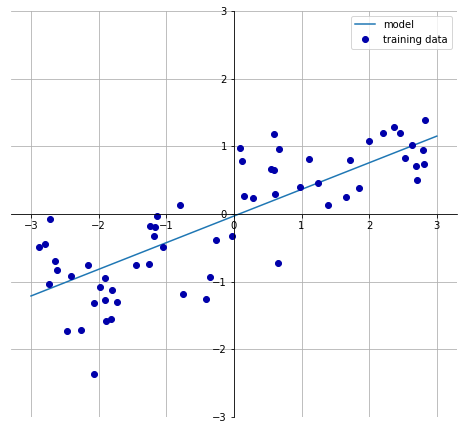

In [3]:
# 1차원 wave 데이터셋으로 파라미터 w[0], b를 직선처럼 되도록 학습시키기
mglearn.plots.plot_linear_regression_wave()

# 회귀를 위한 선형 모델 특징
# - 특성이 하나일 때: 직선
# - 두 개일 때: 평면
# - 특성이 더 많음(더 높은 차원): 초평면(hyperplane)

In [4]:
# 회귀를 위한 선형 모델들의 차이점
# 모델 파라미터 w와 b를 학습하는 방법, 모델의 복잡도를 제어하는 방법

## 1-1. 선형 회귀(최소제곱법)

In [100]:
# 선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squares)
# : 예측과 training set에 있는 target y 사이의 평균제곱오차(mean squared error)를 
# 최소화하는 파라미터 w와 b를 찾는다.

# 평균제곱오차(MSE)
# : 예측값과 target값의 차이를 제곱하여 더한 후에 sample 개수로 나눈 것
# MSE = 1/n∑i=1~n(y_i = y^_i)^2

# 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할
# 방법이 없다.

### 1) 선형 모델 만들기

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터 w  = 가중치(weight) 또는 계수(coefficient)
# coef_ 속성에 저장되어 있음
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열
# 파라미터 b = 편향(offset) 또는 절편(intercept)
# intercept_ 속성에 저장되어 있음
# intercept_ 속성은 항상 실수(float)값 하나
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# scikit-learn은 training data에서 유도된 속성은 항상 맨 끝에 _를 붙임
# 사용자가 지정한 매개변수와 구분하기 위해

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
# training set, test set의 성능 테스트
print("training set 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(lr.score(X_test, y_test)))

# R^2 값 0.66은 그리 좋은 결과는 아님
# 하지만 training set와 test set 점수가 매우 비슷하기 때문에
# 과대적합이 아니라 과소적합인 상태를 의미
# 1차원 데이터셋에서는 모델이 매우 단순하여(혹은 제한적이므로)
# 과대적합을 걱정할 필요 없음
# 그러나 (특성이 많은) 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서
# 과대적합될 가능성이 높다.

training set 점수: 0.67
test set 점수: 0.66


### 2) LinearRegression 모델 과대적합 확인하기

In [106]:
# 보스턴 주택가격 데이터셋을 이요한 LinearRegression 모델 과대적합 확인하기

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("training set 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(lr.score(X_test, y_test)))

# training set에서는 예측이 매우 정확하지만
# test set에서는 R^2값이 매우 낮아 과대적합
# 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
# 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 릿지 회귀이다.

training set 점수: 0.95
test set 점수: 0.61


## 1-2. 릿지 회귀

In [12]:
# 릿지(Ridge) 회귀도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 예측 함수 사용
# 릿지 회귀에서 가중치(w) 선택은 training data를 잘 예측하기 위해서 뿐만 아니라
# 추가 제약 조건을 만족시키기 위한 목적도 있다.
# 가중치의 절댓값을 가능한 한 작게 만드는 것
# 다시 말해 w의 모든 원소가 0에 가깝게 되길 원한다.
# 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만든다.(기울기를
# 작게 만든다)
# 이런 제약을 규제(regularization)라고 한다.

# 규제: 과대적합되지 않도록 모델을 강제로 제한한다는 의미
# 릿지 회귀에서 사용하는 규제 방식: L2 규제

# 수학적으로 릿지는 계수의 L2 노름(norm)의 제곱을 패널티로 적용
# 평균제곱오차 식에 α∑j=1~m |w_j^2|을 더한다.
# α를 크게 하면 가중치가 감소하여 패널티의 효과가 커지고(규제를 중요시함),
# α를 작게 하면 그 반대가 된다(규제를 중요시 하지않음). 즉 가중치가 증가한다.

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("training set 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# training set의 점수는 LinearRegression보다 낮지만 test set에 대한 점수는 더 높다.
# 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에
# 과대적합이 적어진다.
# 모델의 복잡도가 낮아지면 training set에서의 성능은 나빠지지만 
# 더 일반화된 모델이 된다.
# 관심있는 것은 test set에 대한 성능이기 때문에 LinearRegression보다
# Ridge 모델을 선택해야 한다.

training set 점수: 0.89
test set 점수: 0.75


### 1) alpha를 조정한 릿지 회귀

In [18]:
# Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고, training set에 대한 성능 사이를
# 절충할 수 있는 방법을 제공한다.
# alpha 매개변수로 training set의 성능 대비 모델을 얼마나 단순화할지 지정 가능
# 위 예제 alpha=1.0 (default)
# 최적의 alpha값은 사용하는 데이터셋에 달림
# alpha값을 높이면 계수를 0에 더 가깝게 만들어서 training set 성능은 나빠지지만
# 일반화에는 도움을 줄 수 있다.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("--- ridge10 ---")
print("training set 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
print()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("--- ridge0.1 ---")
print("training set 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 오른쪽(과대적합쪽?)으로 이동
# 아주 작은 alpha값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과
# 거의 같아짐
# alpha=0.1이 꽤 좋은 성능 발휘함

--- ridge10 ---
training set 점수: 0.79
test set 점수: 0.64

--- ridge0.1 ---
training set 점수: 0.93
test set 점수: 0.77


### 2) 규제 효과 이해하기; alpha값에 따른 모델의 coef_ 속성 변화

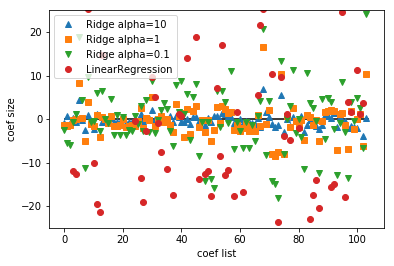

In [108]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("coef list")
plt.ylabel("coef size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# x축: coef_ 원소를 위치대로 나열, 특성에 연관된 계수들 나열, 0 ~ 100 특성
# y축: 계수의 수치
# alpha=10일 때 대부분의 계수는 -3 ~ 3 사이에 위치한다.
# alpha=1일 때 모델의 계수는 더 커짐
# alpha=0일 때(아무런 규제 없는) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감

### 3) 규제 효과 이해하기; alpha를 고정하고 training data 크기 변화시키기

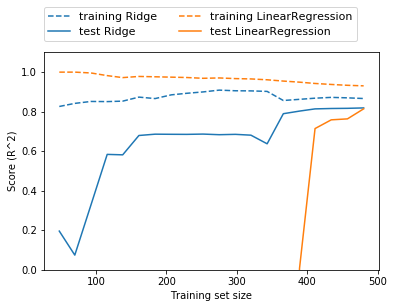

In [29]:
# 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 
# LinearRegression과 Ridge(alpha=1)을 적용한 것
# 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 학습 곡선 그래프
# 학습 곡선(learning curve): training 과정을 여러 번 반복하면서 학습하는 알고리즘에서는
#                           반복의 횟수에 따른 성능 변화를 나타내는 그래프
mglearn.plots.plot_ridge_n_samples()

# 예상대로 모든 데이터셋에 대해 릿지, 선형 회귀 모두 training set 점수가 더 높다.
# training data 점수가 전체적으로 선형 회귀보다 릿지가 낮다.(규제가 적용되므로)
# 그러나 test data에서는 릿지 점수가 더 높고 특별히 작은 데이터셋에서는 더 그렇다.
# 데이터셋 크기가 400미만에서 선형 회귀는 어떤 것도 학습 못함
# 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막엔 선형 회귀가 릿지 회귀를
# 따라잡는다.
# 이 말은 데이터를 충분히 주면 규제 항은 덜 중요해져서 성능이 같아질 것이다.

# 선형 회귀의 training data 성능이 감소하는 것은 데이터가 많아질수록 모델이
# 데이터를 기억하거나 과대적합하기 어려워지기 때문

## 1-3. 라쏘

In [30]:
# Ridge의 대안
# 라쏘(lasso)는 L1 규제를 사용하여 계수를 0에 가깝게 만듬
# lasso의 결과로 어떤 계수는 0이 되어 모델에서 완전히 제외되는 특성이 생긴다.
# 즉 특성 선택(feature selection)이 자동으로 이뤄진다.
# 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이
# 무엇인지 드러내준다.

# L1 규제: 평균제곱오차 식에 L1 노름 α∑j=1~m |w_j|를 더한다.(L2는 |w_j^2|)
# 릿지와 마찬가지로 α를 크게하면 패널티 효과가 커지고(가중치 감소),
# 작게 하면 그 반대가 됨

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("training set 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso.coef_ != 0)))

# 결과가 모두 좋지 않다. 과소적합
# 105개 특성 중 4개만 사용함
# alpha=1.0 기본값

training set 점수: 0.29
test set 점수: 0.21
사용한 특성 수: 4


### 1) alpha 값을 줄인 라쏘

In [110]:
# "max_iter(반복 실행하는 최대 횟수)" 기본값을 증가시키지 않으면 
# "max_iter" 값을 늘리라는 경고 발생

# 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent) 방식을 사용하며
# 학습 과정이 반복적으로 여러 번 진행되면서 최적의 값을 찾아간다.
# alpha값을 줄이게 되면 가장 낮은 오차를 찾아가는 이 반복 횟수가 늘어남
# 반복 횟수는 Lasso 객체의 n_iter_ 속성에 저장

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("training set 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso001.coef_ != 0)))
print("반복 횟수: {}".format(lasso001.n_iter_))

# alpha 값을 낮추면 모델의 복잡도는 증가하여 성능이 좋아짐
# 성능은 Ridge보다 조금 더 좋고 사용된 특성은 105개 중 33개뿐이어서
# 모델을 분석하기가 조금 더 쉽다.

training set 점수: 0.90
test set 점수: 0.77
사용한 특성 수: 33
반복 횟수: 1863


In [34]:
# alpha 값을 너무 낮추면 규제 효과가 없어져 과대적합되어 LinearRegression과 비슷해짐
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso00001.coef_ != 0)))

training set 점수: 0.95
test set 점수: 0.64
사용한 특성 수: 94


### 2) alpha 값에 따른 모델의 coef_ 속성 변화

Text(0,0.5,'coef size')

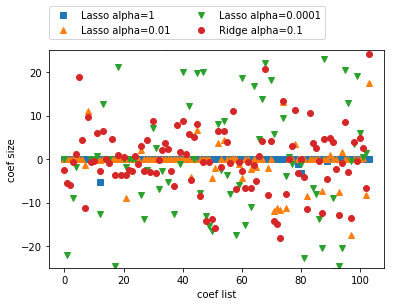

In [117]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list")
plt.ylabel("coef size")

# alpha=1일 때, 계수 대부분 0, 나머지 계수들도 크기가 작음
# alpha=0.01일 때, 대부분 특성이 0이 되는 분포
# alpha=0.00001일 때, 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않는 모델
# alpha=0.1 Ridge일 때, 라쏘 모델과 성능이 비슷하지만 어떤 계수도 0이 안 됨

# 보통 Ridge 회귀 선호
# 하지만 특성이 많고 그 중 일부분만 중요하다면 또는 분석하기 쉬운 모델을 원할 때
# Lasso가 더 좋은 선택일 수 있음

## 1-4. ElasticNet

In [43]:
# ElasticNet: scikit-learn의 Lasso와 Ridge의 패널티를 결합한 모델
# 최상의 성능을 내지만 L1 규제, L2 규제를 위한 매개변수 2개를 조정해야 한다.

# l1_ratio 매개변수: L1 규제와 L2 규제의 비율을 조정한다.
#  - 범위: 0 ~ 1
# L2의 비율: 1 - l1_ratio

# ElasticNet 규제 식
# : alpha * 1l_ratio * ∑j=1~m w_j + 12 * alpha * (1 - l1_ratio) * ∑j=1~m w_j^2
# L1, L2 규제를 l_1, l_2 매개변수로 표현한 식
# : l_1 * ∑j=1~m w_j + 1/2 * l_2 * ∑j=1~m w_j^2
# 이 때 alpha = 1_1 + l_2, l1_ratio = l_1/(l_1 + l_2)가 되므로 
# 규제 정도 l_1, l_2에 맞춰 alpha, l1_ratio 매개변수 조정

# 2. 분류용 선형 모델

In [44]:
# 선형 모델은 분류에도 널리 사용한다.

## 2-1. 이진 분류(binary classification)

In [118]:
# 예측을 위한 방정식
# y^ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

# 선형 회귀와 비슷하지만 특성들의 가중치 합을 그냥 사용하는 대신
# 예측한 값을 임계치 0과 비교한다.
# 계산값이 0보다 작으면, 클래스 = -1
# 0보다 크면, 클래스 = +1
# 모든 분류에 쓰이는 선형모델에서 동일

# 회귀용 선형 모델: 출력 y^이 특성의 선형 함수. 즉 직선, 평면, 초평면(3차원 이상)
# 분류용 선형 모델: 결정 경계가 입력의 선형 함수. 즉 선, 평면, 초평면을 사용해서
#                   2개의 클래스를 구분하는 분류기

# 선형 모델을 학습시키는 알고리즘의 2가지 구분
# 1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
# 2) 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

# 알고리즘들은 training set을 잘 학습하는지 측정하는 방법이 각기 다름
# 하지만 수학적, 기술적 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록
# w, b를 조정하는 것은 불가능(잘못 분류된 결과를 직접 나타내는 0-1 손실 함수는 완전히
# 계단 함수라서 대리할 수 있는 다른 함수(surrogate loss function)를 사용하여 
# 최적화를 수행한다.)
# 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실 함수, loss function)에 대한 차이는
# 크게 중요하지 않다.

# 가장 널리 알려진 2개의 선형 분류 알고리즘
# 1) 로지스틱 회귀(logistic regression): linear_model.LogisticRegression에 구현
#   - 이름에 Regression(회귀)이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘
#   - LogisticRegression 클래스
#     - 이진 분류: 로지스틱(logistic) 손실 함수 사용
#     - 다중 분류: 교차 엔트로피(cross-entropy) 손실 함수 사용
# 2) 서포트 벡터 머신(support vector machine(classifier): svm.LinearSVC에 구현
#   - LinearSVC 클래스
#     - 기본값: 제곱 힌지(squared hinge) 손실 함수 사용

### 1) LogisticRegression, LinearSVC 결정 경계

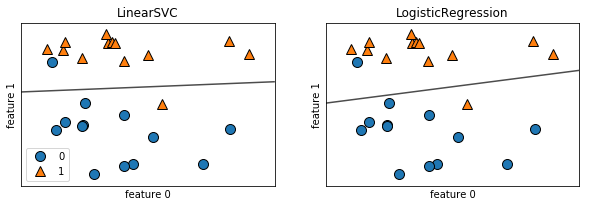

In [123]:
# forge 데이터셋

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

# 결정 경계 직선 위쪽은 클래스 1
# 아래쪽은 클래스 0
# 새로운 데이터가 직선 위쪽에 놓이면 클래스 1로 분류, 아래쪽에 놓이면 클래스 0으로 분류
# 두 모델이 똑같은 포인트 2개를 잘못 분류함
# 두 모델은 기본적으로 L2 규제 사용

# 두 모델에서 규제의 강도를 결정하는 매개변수: C
# C값이 높아지면 규제 감소
# 높은 C값: 두 모델이 training set에 가능한 최대로 맞추려고 함
# 낮은 C값: 계수 벡터(w)가 0에 가까워지도록 만듬

In [ ]:
# C값의 다른 설명
# C값이 높아지면: 개개의 데이터 포인트를 정확히 분류하려고 함
# C값이 낮아지면: 데이터 포인트 중 다수에 맞추려고 함

### 2) C값에 따른 선형 SVM 모델의 결정 경계

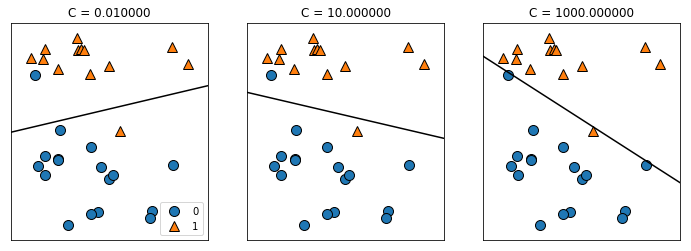

In [59]:
mglearn.plots.plot_linear_svc_regularization()

# 왼쪽 그림: 아주 작은 C값 때문에 규제가 많이 적용됨
#  - 클래스 0 대부분은 아래에 위치, 클래스 1 대부분은 위에 위치
#  - 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만듬
#  - 잘못 분류한 데이터 포인트: 2개
# 중간 그림: C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐
# 오른쪽 그림: C값이 아주 크고 결정 경계는 더 기울어짐
#  - 클래스 0의 모든 데이터 포인트 올바로 분류
#  - 이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없어 클래스 1의 포인트
#    하나 잘못 분류
#  - 모든 데이터 포인트를 정확하게 분류하려 했지만 클래스의 전체적인 배치는 잘 
#    파악하지 못함 = 과대적합

In [60]:
# 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는
# 결정 경계가 직선이거나 평면이어서 매우 제한적
# 고차원에서는 매우 강력해지지만 특성이 많아지면 과대적합되지 않게 하는 것이 매우 중요

### 3) LogisticRegression

In [62]:
# 유방암 데이터셋

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("training set 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("test set 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 기본값 C=1인 모델이 training set, test set 양쪽에 꽤 훌륭한 성능을 냄
# 하지만 양쪽 성능이 매우 비슷하므로 과소적합으로 판단

training set 점수: 0.955
test set 점수: 0.958


In [64]:
# 모델의 제약을 더 풀어주기 위해 C값 증가
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test set 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

# 정확도가 더 높아짐
# 이는 복잡도가 높은 모델일수록 성능이 좋음을 말함

training set 점수: 0.972
test set 점수: 0.965


In [65]:
# 규제를 더 강하게 하기위해 C=0.01 사용
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test set 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

# 예상대로 이미 과소적합된 모델에서 최적화 성능 그래프의 왼쪽으로 더 이동하게 되므로
# 정확도는 기본 매개변수일 때보다 낮아짐

training set 점수: 0.934
test set 점수: 0.930


### 4) L2 규제를 사용한 C에 따른 LogisticLegression coef_값

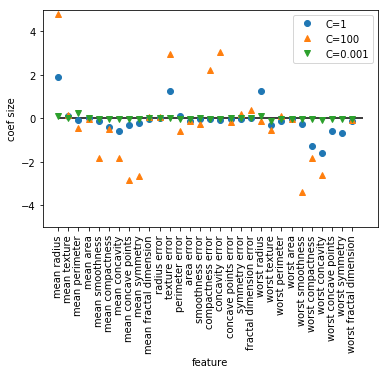

In [71]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend()

# LogisticRegression은 기본으로 L2 규제를 적용하므로 out[28] 모습과 비슷
# 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않는다.
# 세 번째 계수(mean perimeter)에서 
# C=100, C=1일 때 계수는 음수이지만, C=0.001일 때는 양수가 되고, C=1일 때보다도 
# 절댓값이 더 크다.

# 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있다.
# 예) "texture error" 특성: 악성인 샘플과 관련이 깊다.
# 예) "mean perimeter" 특성: 양성이나 악성의 신호 모두가 될 수 있음(계수 부호가 바뀜)
# 그래서 선형모델 계수는 항상 의심해봐야 하고 조심해서 해석해야 함

In [72]:
# 더 이해하기 쉬운 모델을 원한다면(비록 모델이 몇 개의 특성만 사용하게 되겠지만)
# L1 규제를 사용하는 것이 좋다.

### 5) L1 규제를 사용한 LogisticRegression의 분류 정확도와 계수 그래프

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


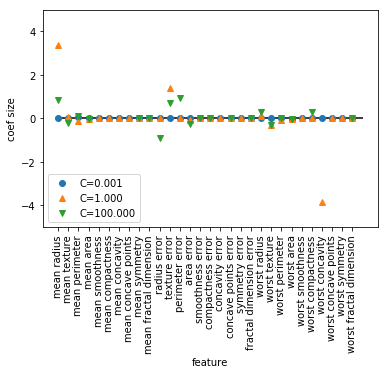

In [79]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}"
          .format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}"
          .format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef size")
plt.ylim(-5, 5)
plt.legend(loc=3)

# 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많다.
# 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지
# 일부 특성만을 사용할지 결정하는 penalty 매개변수이다.
# LogisticRegression, LinearSVC의 penalty 매개변수에 설정할 수 있는 값은
# 일부 특성만 사용하는 L1 규제의 l1, 전체 특성을 모두 사용하는 L2 규제의 l2이다.

## 2-2. 다중 클래스 분류용 선형 모델

In [124]:
# (로지스틱 회귀만 제외하고) 많은 선형 분류 모델은 태생적으로 이진 분류만 지원한다.
# 즉, 다중 클래스(multiclass) 미지원
# 로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원

# 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법:
# 일대다(one-vs.-rest 또는 one-vs.-all) 방법
# LogisticRegression, LinearSVC에 있는 multi_class 매개변수의 기본값: ovr

# 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
# 결국 클래스 수만큼 이진 분류 모델이 만들어짐
# 예측 시 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의
# 클래스를 예측값으로 선택

# 클래스별 이진 분류기를 만들면 각 클래스가 계수 백터(w)와 절편(b)을 하나씩 갖게 된다.
# 결국 분류 신뢰도 공식 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당
# 분류 신뢰도를 나타내는 공식
# w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

# 다중 클래스 로지스틱 회귀의 수학은 일대다 방식과 조금 다르지만
# 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들고 예측 방법도 동일
# 다중 클래스 로지스틱 회귀 공식
# Pr(Y_i = c) = e^(W_c·X_i)/(∑k=1~K e^(W_c·X_i))
# 풀이: i번째 데이터 포인트 X_i의 출력 Y_i가 클래스 c일 확률 = K개 클래스에 대한 
#       각각의 계수 W를 데이터 포인트에 곱하여 지수함수를 적용한 합으로 클래스 c에 대한
#       값을 나누어 계산
# 보통 softmax 함수에서 수식 간소화를 위해 절편(b)은 계수 벡터(W)에 포함된 걸로 나타냄
# 따라서 다중 클래스 로지스틱 회귀에서도 클래스마다 계수 벡터, 절편 존재

### 1) 일대다 방식

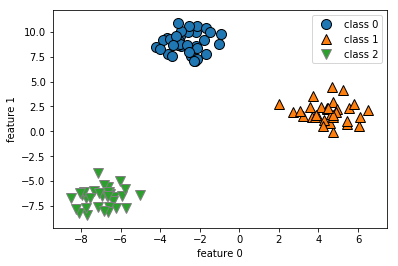

In [81]:
# 3개 클래스를 가진 데이터셋에 일대다 방식 적용
# 데이터셋은 2차원, 각 클래스 데이터는 정규분포가우시안 분포를 따름

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

In [83]:
# LinearSVC 분류기로 훈련
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

# coef_ 행: 3개 클래스에 각각 대응하는 계수 벡터
# coef_ 열: 각 특성에 따른 계수 값(이 데이터셋에서는 2개)
# intercept_: 각 클래스의 절편을 담은 1차원 벡터

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


### 2) 3개의 이진 분류기가 만드는 경계 시각화

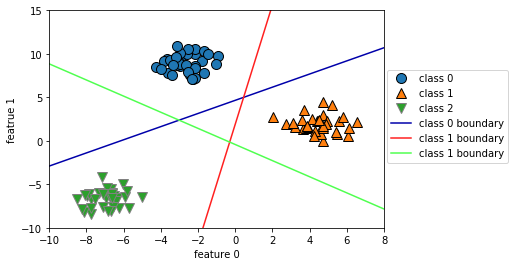

In [92]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)

plt.xlabel("feature 0")
plt.ylabel("featrue 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary"
           , "class 1 boundary"], loc=(1.01, 0.3))

# training data의 class 0에 속한 포인트
#  - class 0을 구분하는 직선 위, 즉 이진 분류기가 만든 class 0 지역에 위치
#  - class 2를 구분하는 직선 위, 즉 class 2의 이진 분류기에 의해 나머지로 분류됨
#  - class 1을 구분하는 직선 왼쪽, 즉 class 1의 이진 분류기에 의해서도 나머지로 분류됨
#  - 그러므로 이 영역의 어떤 포인트든 최종 분류기는 class 0으로 분류
#    (class 0 분류 신뢰도 공식 결과는 0보다 크고 다른 두 class의 경우보다 작을 것이다.)

# 세 분류기가 모두 나머지로 분류한 중앙 삼각형에 데이터 포인트가 들어오면
# 분류 공식 결과가 가장 높은 class로 분류됨
# 즉 가장 가까운 직선의 class가 된다.

### 3) 3개의 일대다 분류기가 만든 다중 클래스 결정 경계에서 모든 포인트에 대한 예측 결과

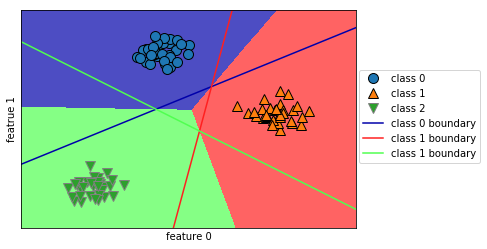

In [97]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel("feature 0")
plt.ylabel("featrue 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary"
           , "class 1 boundary"], loc=(1.01, 0.3))

# 3. 선형 모델의 장단점과 매개변수

In [98]:
# 선형 모델의 주요 매개변수
# 1)
#  - 회귀 모델: alpha
#    LinearSVC, LogisticRegression(분류 모델): C
#  - alpha값이 클수록, C값이 작을수록 모델이 단순해짐
#  - 회귀 모델에서 이 매개변수 조정은 매우 중요한 일
#  - 보통 C, alpha는 로그 스케일로 최적치를 정함(보통 자릿수가 바뀌도록 10배씩 변경
#    즉 0.01, 0.1, 1, 10 등)
# 2)
#  - L1 규제를 사용할지 L2 규제를 사용할지 정해야 함
#  - 중요 특성이 많지 않다고 생각하면 L1 규제 사용, 반대면 L2 규제 사용
#  - L1 규제는 모델의 해석이 중요한 요소일 때도 사용 가능
#  - L1 규제는 몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고
#    그 효과가 어느 정도인지 설명하기 쉬움

# 선형모델 특성
# 1)
#  - 학습 속도가 빠르고 예측도 빨라 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동
#  - 수십~수백만 개 샘플 데이터셋이라면 기본 설정보다 빨리 처리하도록 
#    LogisticRegression과 Ridge에 solver='sag' 옵션을 준다. 
#    (sag = Stochastic Average Gradient descent, 확률적 평균 경사 하강법)
#  - 다른 대안으로 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier와 
#    SGDRegressor를 사용할 수 있다.
#    (SGD = Stochastic Gradient Descent, 확률적 경사 하강법)
# 2)
#  - 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해 가능
#  - 종종 계수의 값이 왜 그런지 명확하지 않을 때가 있다. 
#    특히 특성들이 서로 깊게 연관되어 있을 때
#  - 이럴 땐 계수 분석이 매우 어려울 수 있음
# 3) 
#  - 샘플에 비해 특성이 많을 때 잘 작동
#  - 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델 많이 사용한다.
#  - 저차원 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다.
#    예) 위 "커널화 서포트 벡터 머신"에서 선형 모델의 실패

### 메서드 연결

In [ ]:
# 모든 scikit-learn의 fit() 메서드는 self를 반환
# 즉 fit() 메서드의 반환값은 학습된 모델, 변수에 할당한다.
# 이처럼 메서드 호출을 잇는 것을 메서드 연결(method chaining)이라고 함
# scikit-learn에서는 fit과 predict를 한 줄에 쓰는 메서드 연결도 자주 사용
# 예) logreg = LogisticRegression()
#     y_pred = logreg.fit(X_train, y_train).predict(X_test)
# 모델 객체 생성, 훈련, 예측 모두 한 줄도 가능
# 예) y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
# 이렇게 짧게 쓰는 건 코드 읽기 어려워져 비추천
# 더군다나 학습된 로지스틱 회귀 모델은 변수에 할당되지 않는다.
# (예측 결과를 담은 변수만 남는다.)